In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
train_data.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [6]:
train_data.shape

(10886, 12)

In [7]:
train_data = train_data[np.abs(train_data['count']-train_data['count'].mean())<=3*train_data['count'].std()]

In [8]:
train_data.shape

(10739, 12)

In [9]:
train_data.describe()

season       holiday    workingday       weather          temp  \
count  10739.000000  10739.000000  10739.000000  10739.000000  10739.000000   
mean       2.500978      0.028960      0.676786      1.420710     20.130507   
std        1.119043      0.167702      0.467726      0.634956      7.777571   
min        1.000000      0.000000      0.000000      1.000000      0.820000   
25%        2.000000      0.000000      0.000000      1.000000     13.940000   
50%        2.000000      0.000000      1.000000      1.000000     20.500000   
75%        4.000000      0.000000      1.000000      2.000000     26.240000   
max        4.000000      1.000000      1.000000      4.000000     41.000000   

              atemp      humidity     windspeed        casual    registered  \
count  10739.000000  10739.000000  10739.000000  10739.000000  10739.000000   
mean      23.548846     62.049632     12.787706     35.220039    147.783779   
std        8.463179     19.241364      8.171075     49.546882    136.370597   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     35.000000   
50%       24.240000     62.000000     12.998000     16.000000    116.000000   
75%       31.060000     78.000000     16.997900     47.000000    217.000000   
max       45.455000    100.000000     56.996900    367.000000    712.000000   

              count  
count  10739.000000  
mean     183.003818  
std      166.681429  
min        1.000000  
25%       41.000000  
50%      141.000000  
75%      276.000000  
max      734.000000

In [10]:
test_data = pd.read_csv('test.csv')

In [11]:
data = train_data.append(test_data)
data.reset_index(inplace=True)
data

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


index   atemp  casual  count             datetime  holiday  humidity  \
0          0  14.395     3.0   16.0  2011-01-01 00:00:00        0        81   
1          1  13.635     8.0   40.0  2011-01-01 01:00:00        0        80   
2          2  13.635     5.0   32.0  2011-01-01 02:00:00        0        80   
3          3  14.395     3.0   13.0  2011-01-01 03:00:00        0        75   
4          4  14.395     0.0    1.0  2011-01-01 04:00:00        0        75   
5          5  12.880     0.0    1.0  2011-01-01 05:00:00        0        75   
6          6  13.635     2.0    2.0  2011-01-01 06:00:00        0        80   
7          7  12.880     1.0    3.0  2011-01-01 07:00:00        0        86   
8          8  14.395     1.0    8.0  2011-01-01 08:00:00        0        75   
9          9  17.425     8.0   14.0  2011-01-01 09:00:00        0        76   
10        10  19.695    12.0   36.0  2011-01-01 10:00:00        0        76   
11        11  16.665    26.0   56.0  2011-01-01 11:00:00        0        81   
12        12  21.210    29.0   84.0  2011-01-01 12:00:00        0        77   
13        13  22.725    47.0   94.0  2011-01-01 13:00:00        0        72   
14        14  22.725    35.0  106.0  2011-01-01 14:00:00        0        72   
15        15  21.970    40.0  110.0  2011-01-01 15:00:00        0        77   
16        16  21.210    41.0   93.0  2011-01-01 16:00:00        0        82   
17        17  21.970    15.0   67.0  2011-01-01 17:00:00        0        82   
18        18  21.210     9.0   35.0  2011-01-01 18:00:00        0        88   
19        19  21.210     6.0   37.0  2011-01-01 19:00:00        0        88   
20        20  20.455    11.0   36.0  2011-01-01 20:00:00        0        87   
21        21  20.455     3.0   34.0  2011-01-01 21:00:00        0        87   
22        22  20.455    11.0   28.0  2011-01-01 22:00:00        0        94   
23        23  22.725    15.0   39.0  2011-01-01 23:00:00        0        88   
24        24  22.725     4.0   17.0  2011-01-02 00:00:00        0        88   
25        25  21.970     1.0   17.0  2011-01-02 01:00:00        0        94   
26        26  21.210     1.0    9.0  2011-01-02 02:00:00        0       100   
27        27  22.725     2.0    6.0  2011-01-02 03:00:00        0        94   
28        28  22.725     2.0    3.0  2011-01-02 04:00:00        0        94   
29        29  21.210     0.0    2.0  2011-01-02 06:00:00        0        77   
...      ...     ...     ...    ...                  ...      ...       ...   
17202   6463  10.605     NaN    NaN  2012-12-30 18:00:00        0        44   
17203   6464  18.180     NaN    NaN  2012-12-30 19:00:00        0        61   
17204   6465   9.850     NaN    NaN  2012-12-30 20:00:00        0        47   
17205   6466  10.605     NaN    NaN  2012-12-30 21:00:00        0        51   
17206   6467   9.850     NaN    NaN  2012-12-30 22:00:00        0        55   
17207   6468   9.850     NaN    NaN  2012-12-30 23:00:00        0        51   
17208   6469   9.090     NaN    NaN  2012-12-31 00:00:00        0        55   
17209   6470   9.090     NaN    NaN  2012-12-31 01:00:00        0        55   
17210   6471   8.335     NaN    NaN  2012-12-31 02:00:00        0        59   
17211   6472   9.090     NaN    NaN  2012-12-31 03:00:00        0        59   
17212   6473   8.335     NaN    NaN  2012-12-31 04:00:00        0        69   
17213   6474   7.575     NaN    NaN  2012-12-31 05:00:00        0        64   
17214   6475   8.335     NaN    NaN  2012-12-31 06:00:00        0        64   
17215   6476   9.090     NaN    NaN  2012-12-31 07:00:00        0        64   
17216   6477   7.575     NaN    NaN  2012-12-31 08:00:00        0        69   
17217   6478  10.605     NaN    NaN  2012-12-31 09:00:00        0        64   
17218   6479  10.605     NaN    NaN  2012-12-31 10:00:00        0        69   
17219   6480  11.365     NaN    NaN  2012-12-31 11:00:00        0        60   
17220   6481  11.365     NaN    NaN  2012-12-31 12:00:00 

In [12]:
data.drop('index', inplace=True, axis=1)
data

atemp  casual  count             datetime  holiday  humidity  \
0      14.395     3.0   16.0  2011-01-01 00:00:00        0        81   
1      13.635     8.0   40.0  2011-01-01 01:00:00        0        80   
2      13.635     5.0   32.0  2011-01-01 02:00:00        0        80   
3      14.395     3.0   13.0  2011-01-01 03:00:00        0        75   
4      14.395     0.0    1.0  2011-01-01 04:00:00        0        75   
5      12.880     0.0    1.0  2011-01-01 05:00:00        0        75   
6      13.635     2.0    2.0  2011-01-01 06:00:00        0        80   
7      12.880     1.0    3.0  2011-01-01 07:00:00        0        86   
8      14.395     1.0    8.0  2011-01-01 08:00:00        0        75   
9      17.425     8.0   14.0  2011-01-01 09:00:00        0        76   
10     19.695    12.0   36.0  2011-01-01 10:00:00        0        76   
11     16.665    26.0   56.0  2011-01-01 11:00:00        0        81   
12     21.210    29.0   84.0  2011-01-01 12:00:00        0        77   
13     22.725    47.0   94.0  2011-01-01 13:00:00        0        72   
14     22.725    35.0  106.0  2011-01-01 14:00:00        0        72   
15     21.970    40.0  110.0  2011-01-01 15:00:00        0        77   
16     21.210    41.0   93.0  2011-01-01 16:00:00        0        82   
17     21.970    15.0   67.0  2011-01-01 17:00:00        0        82   
18     21.210     9.0   35.0  2011-01-01 18:00:00        0        88   
19     21.210     6.0   37.0  2011-01-01 19:00:00        0        88   
20     20.455    11.0   36.0  2011-01-01 20:00:00        0        87   
21     20.455     3.0   34.0  2011-01-01 21:00:00        0        87   
22     20.455    11.0   28.0  2011-01-01 22:00:00        0        94   
23     22.725    15.0   39.0  2011-01-01 23:00:00        0        88   
24     22.725     4.0   17.0  2011-01-02 00:00:00        0        88   
25     21.970     1.0   17.0  2011-01-02 01:00:00        0        94   
26     21.210     1.0    9.0  2011-01-02 02:00:00        0       100   
27     22.725     2.0    6.0  2011-01-02 03:00:00        0        94   
28     22.725     2.0    3.0  2011-01-02 04:00:00        0        94   
29     21.210     0.0    2.0  2011-01-02 06:00:00        0        77   
...       ...     ...    ...                  ...      ...       ...   
17202  10.605     NaN    NaN  2012-12-30 18:00:00        0        44   
17203  18.180     NaN    NaN  2012-12-30 19:00:00        0        61   
17204   9.850     NaN    NaN  2012-12-30 20:00:00        0        47   
17205  10.605     NaN    NaN  2012-12-30 21:00:00        0        51   
17206   9.850     NaN    NaN  2012-12-30 22:00:00        0        55   
17207   9.850     NaN    NaN  2012-12-30 23:00:00        0        51   
17208   9.090     NaN    NaN  2012-12-31 00:00:00        0        55   
17209   9.090     NaN    NaN  2012-12-31 01:00:00        0        55   
17210   8.335     NaN    NaN  2012-12-31 02:00:00        0        59   
17211   9.090     NaN    NaN  2012-12-31 03:00:00        0        59   
17212   8.335     NaN    NaN  2012-12-31 04:00:00        0        69   
17213   7.575     NaN    NaN  2012-12-31 05:00:00        0        64   
17214   8.335     NaN    NaN  2012-12-31 06:00:00        0        64   
17215   9.090     NaN    NaN  2012-12-31 07:00:00        0        64   
17216   7.575     NaN    NaN  2012-12-31 08:00:00        0        69   
17217  10.605     NaN    NaN  2012-12-31 09:00:00        0        64   
17218  10.605     NaN    NaN  2012-12-31 10:00:00        0        69   
17219  11.365     NaN    NaN  2012-12-31 11:00:00        0        60   
17220  11.365     NaN    NaN  2012-12-31 12:00:00        0        56   
17221  12.880     NaN    NaN  2012-12-31 13:00:00        0        44   
17222  13.635     NaN    NaN  2012-12-31 14:00:00        0        45   
17223  14.395     NaN    NaN  2012-12-31 15:00:00        0        45   
17224  12.880     NaN    NaN  2012-12-31 16:00:00        0        48   
17225  14.395     NaN    NaN  2012-12-31 17:00:0

In [13]:
data['date']=data['datetime'].apply(lambda x: x.split()[0])
data['hour']=data['datetime'].apply(lambda x: x.split()[1].split(':')[0]).astype(int)
data['year']=data['datetime'].apply(lambda x: x.split()[0].split('-')[0])

In [14]:
data.head()

atemp  casual  count             datetime  holiday  humidity  registered  \
0  14.395     3.0   16.0  2011-01-01 00:00:00        0        81        13.0   
1  13.635     8.0   40.0  2011-01-01 01:00:00        0        80        32.0   
2  13.635     5.0   32.0  2011-01-01 02:00:00        0        80        27.0   
3  14.395     3.0   13.0  2011-01-01 03:00:00        0        75        10.0   
4  14.395     0.0    1.0  2011-01-01 04:00:00        0        75         1.0   

   season  temp  weather  windspeed  workingday        date  hour  year  
0       1  9.84        1        0.0           0  2011-01-01     0  2011  
1       1  9.02        1        0.0           0  2011-01-01     1  2011  
2       1  9.02        1        0.0           0  2011-01-01     2  2011  
3       1  9.84        1        0.0           0  2011-01-01     3  2011  
4       1  9.84        1        0.0           0  2011-01-01     4  2011

In [15]:
from datetime import datetime
data['weekday']=data['date'].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").weekday())
data['month']=data['date'].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").month)

In [16]:
data

atemp  casual  count             datetime  holiday  humidity  \
0      14.395     3.0   16.0  2011-01-01 00:00:00        0        81   
1      13.635     8.0   40.0  2011-01-01 01:00:00        0        80   
2      13.635     5.0   32.0  2011-01-01 02:00:00        0        80   
3      14.395     3.0   13.0  2011-01-01 03:00:00        0        75   
4      14.395     0.0    1.0  2011-01-01 04:00:00        0        75   
5      12.880     0.0    1.0  2011-01-01 05:00:00        0        75   
6      13.635     2.0    2.0  2011-01-01 06:00:00        0        80   
7      12.880     1.0    3.0  2011-01-01 07:00:00        0        86   
8      14.395     1.0    8.0  2011-01-01 08:00:00        0        75   
9      17.425     8.0   14.0  2011-01-01 09:00:00        0        76   
10     19.695    12.0   36.0  2011-01-01 10:00:00        0        76   
11     16.665    26.0   56.0  2011-01-01 11:00:00        0        81   
12     21.210    29.0   84.0  2011-01-01 12:00:00        0        77   
13     22.725    47.0   94.0  2011-01-01 13:00:00        0        72   
14     22.725    35.0  106.0  2011-01-01 14:00:00        0        72   
15     21.970    40.0  110.0  2011-01-01 15:00:00        0        77   
16     21.210    41.0   93.0  2011-01-01 16:00:00        0        82   
17     21.970    15.0   67.0  2011-01-01 17:00:00        0        82   
18     21.210     9.0   35.0  2011-01-01 18:00:00        0        88   
19     21.210     6.0   37.0  2011-01-01 19:00:00        0        88   
20     20.455    11.0   36.0  2011-01-01 20:00:00        0        87   
21     20.455     3.0   34.0  2011-01-01 21:00:00        0        87   
22     20.455    11.0   28.0  2011-01-01 22:00:00        0        94   
23     22.725    15.0   39.0  2011-01-01 23:00:00        0        88   
24     22.725     4.0   17.0  2011-01-02 00:00:00        0        88   
25     21.970     1.0   17.0  2011-01-02 01:00:00        0        94   
26     21.210     1.0    9.0  2011-01-02 02:00:00        0       100   
27     22.725     2.0    6.0  2011-01-02 03:00:00        0        94   
28     22.725     2.0    3.0  2011-01-02 04:00:00        0        94   
29     21.210     0.0    2.0  2011-01-02 06:00:00        0        77   
...       ...     ...    ...                  ...      ...       ...   
17202  10.605     NaN    NaN  2012-12-30 18:00:00        0        44   
17203  18.180     NaN    NaN  2012-12-30 19:00:00        0        61   
17204   9.850     NaN    NaN  2012-12-30 20:00:00        0        47   
17205  10.605     NaN    NaN  2012-12-30 21:00:00        0        51   
17206   9.850     NaN    NaN  2012-12-30 22:00:00        0        55   
17207   9.850     NaN    NaN  2012-12-30 23:00:00        0        51   
17208   9.090     NaN    NaN  2012-12-31 00:00:00        0        55   
17209   9.090     NaN    NaN  2012-12-31 01:00:00        0        55   
17210   8.335     NaN    NaN  2012-12-31 02:00:00        0        59   
17211   9.090     NaN    NaN  2012-12-31 03:00:00        0        59   
17212   8.335     NaN    NaN  2012-12-31 04:00:00        0        69   
17213   7.575     NaN    NaN  2012-12-31 05:00:00        0        64   
17214   8.335     NaN    NaN  2012-12-31 06:00:00        0        64   
17215   9.090     NaN    NaN  2012-12-31 07:00:00        0        64   
17216   7.575     NaN    NaN  2012-12-31 08:00:00        0        69   
17217  10.605     NaN    NaN  2012-12-31 09:00:00        0        64   
17218  10.605     NaN    NaN  2012-12-31 10:00:00        0        69   
17219  11.365     NaN    NaN  2012-12-31 11:00:00        0        60   
17220  11.365     NaN    NaN  2012-12-31 12:00:00        0        56   
17221  12.880     NaN    NaN  2012-12-31 13:00:00        0        44   
17222  13.635     NaN    NaN  2012-12-31 14:00:00        0        45   
17223  14.395     NaN    NaN  2012-12-31 15:00:00        0        45   
17224  12.880     NaN    NaN  2012-12-31 16:00:00        0        48   
17225  14.395     NaN    NaN  2012-12-31 17:00:0

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

[Text(0.5,0,'weather'), Text(0.5,1,'distribution of weather')]

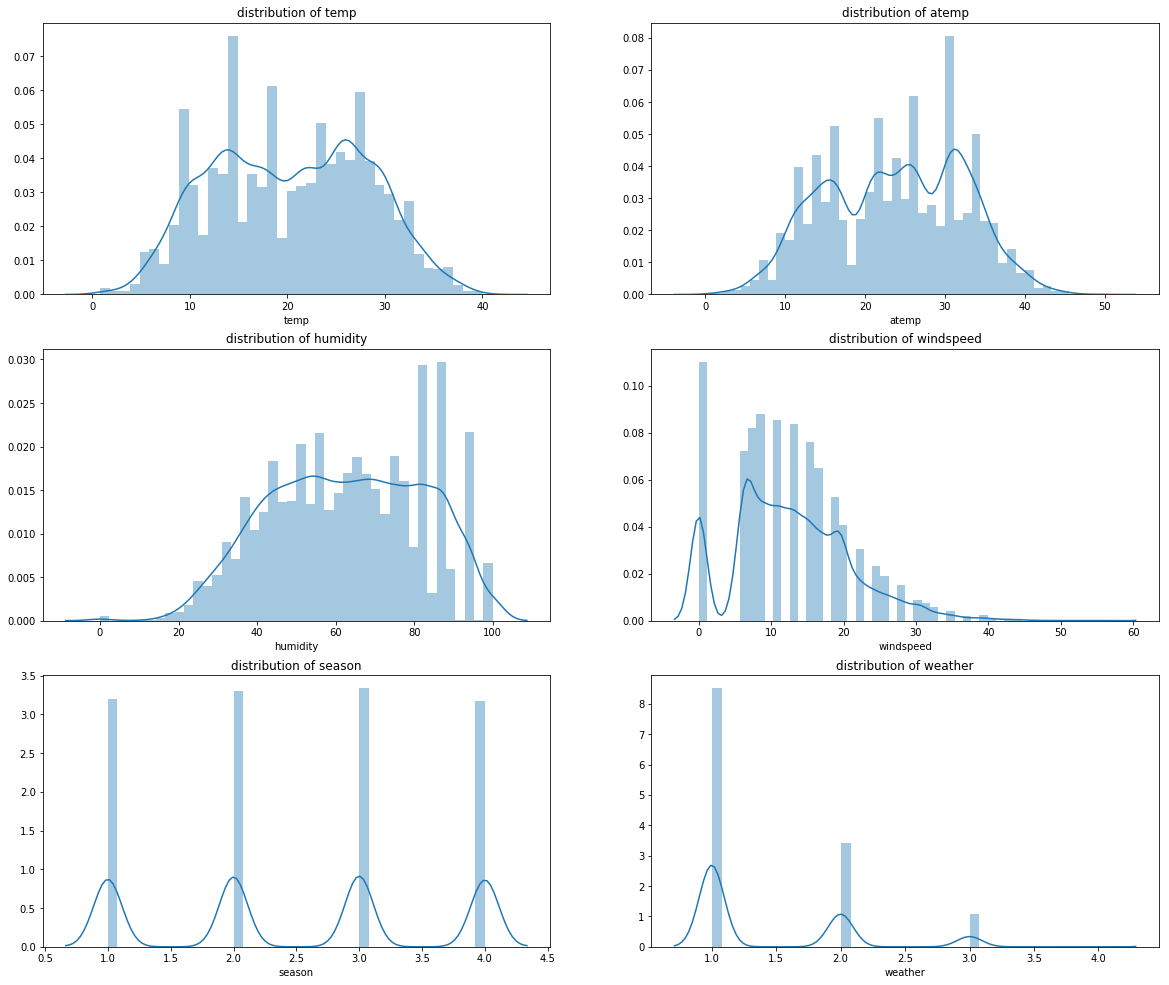

In [17]:
fig, axes = plt.subplots(3,2)
fig.set_size_inches(20,17)
sns.distplot(data['temp'], ax=axes[0][0])
sns.distplot(data['atemp'], ax=axes[0][1])
sns.distplot(data['humidity'], ax=axes[1][0])
sns.distplot(data['windspeed'], ax=axes[1][1])
sns.distplot(data['season'], ax=axes[2][0])
sns.distplot(data['weather'], ax=axes[2][1])
axes[0][0].set(xlabel='temp',title="distribution of temp")
axes[0][1].set(xlabel='atemp',title="distribution of atemp")
axes[1][0].set(xlabel='humidity',title="distribution of humidity")
axes[1][1].set(xlabel='windspeed',title="distribution of windspeed")
axes[2][0].set(xlabel='season',title="distribution of season")
axes[2][1].set(xlabel='weather',title="distribution of weather")

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
data_windspeed_0 = data[data['windspeed']==0]
data_windspeed_not_0 = data[data['windspeed']!=0]
rfModel_wind = RandomForestRegressor(n_estimators=1000,random_state=42)
windColumns = ["month","year","season","weather","humidity","temp","atemp"]
rfModel_wind.fit(data_windspeed_not_0[windColumns], data_windspeed_not_0["windspeed"])
windspeed_0_values = rfModel_wind.predict(data_windspeed_0[windColumns])
data_windspeed_0["windspeed"] = windspeed_0_values
data_windspeed_0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


atemp  casual  count             datetime  holiday  humidity  \
0      14.395     3.0   16.0  2011-01-01 00:00:00        0        81   
1      13.635     8.0   40.0  2011-01-01 01:00:00        0        80   
2      13.635     5.0   32.0  2011-01-01 02:00:00        0        80   
3      14.395     3.0   13.0  2011-01-01 03:00:00        0        75   
4      14.395     0.0    1.0  2011-01-01 04:00:00        0        75   
6      13.635     2.0    2.0  2011-01-01 06:00:00        0        80   
7      12.880     1.0    3.0  2011-01-01 07:00:00        0        86   
8      14.395     1.0    8.0  2011-01-01 08:00:00        0        75   
9      17.425     8.0   14.0  2011-01-01 09:00:00        0        76   
64     12.880     8.0  110.0  2011-01-03 19:00:00        0        47   
89     13.635     0.0   48.0  2011-01-04 21:00:00        0        64   
92     12.880     0.0    6.0  2011-01-05 00:00:00        0        64   
114    12.880     1.0   19.0  2011-01-05 23:00:00        0        47   
115    12.120     0.0   11.0  2011-01-06 00:00:00        0        55   
116    11.365     0.0    4.0  2011-01-06 01:00:00        0        64   
117    11.365     0.0    2.0  2011-01-06 02:00:00        0        64   
121    11.365     0.0   95.0  2011-01-06 07:00:00        0        59   
122    11.365     3.0  219.0  2011-01-06 08:00:00        0        59   
123    12.120     6.0  122.0  2011-01-06 09:00:00        0        51   
124    12.880     3.0   45.0  2011-01-06 10:00:00        0        47   
126    14.395     6.0   84.0  2011-01-06 12:00:00        0        35   
129    13.635     8.0   62.0  2011-01-06 15:00:00        0        36   
142    13.635     0.0    5.0  2011-01-07 05:00:00        0        55   
143    12.880     8.0   34.0  2011-01-07 06:00:00        0        69   
154    12.880     9.0  187.0  2011-01-07 17:00:00        0        37   
163    12.120     3.0   16.0  2011-01-08 02:00:00        0        55   
238    11.365     2.0   99.0  2011-01-11 07:00:00        0        55   
250    11.365     0.0   51.0  2011-01-11 19:00:00        0        93   
306     9.090     0.0   17.0  2011-01-14 06:00:00        0        54   
308     8.335     2.0  158.0  2011-01-14 08:00:00        0        68   
...       ...     ...    ...                  ...      ...       ...   
16956  16.665     NaN    NaN  2012-12-20 10:00:00        0        66   
17023  12.880     NaN    NaN  2012-12-23 05:00:00        0        51   
17037  16.665     NaN    NaN  2012-12-23 19:00:00        0        42   
17038  15.150     NaN    NaN  2012-12-23 20:00:00        0        65   
17039  14.395     NaN    NaN  2012-12-23 21:00:00        0        70   
17041  14.395     NaN    NaN  2012-12-23 23:00:00        0        60   
17042  13.635     NaN    NaN  2012-12-24 00:00:00        0        69   
17043  13.635     NaN    NaN  2012-12-24 01:00:00        0        69   
17044  12.880     NaN    NaN  2012-12-24 02:00:00        0        75   
17045  12.880     NaN    NaN  2012-12-24 03:00:00        0        75   
17047  12.880     NaN    NaN  2012-12-24 06:00:00        0        75   
17048  12.880     NaN    NaN  2012-12-24 07:00:00        0        69   
17049  13.635     NaN    NaN  2012-12-24 08:00:00        0        69   
17051  15.150     NaN    NaN  2012-12-24 10:00:00        0        65   
17063  14.395     NaN    NaN  2012-12-24 22:00:00        0        93   
17064  14.395     NaN    NaN  2012-12-24 23:00:00        0        93   
17072  14.395     NaN    NaN  2012-12-25 08:00:00        1        87   
17073  12.880     NaN    NaN  2012-12-25 09:00:00        1        87   
17074  15.910     NaN    NaN  2012-12-25 10:00:00        1        81   
17151  15.910     NaN    NaN  2012-12-28 15:00:00        0        49   
17160  12.120     NaN    NaN  2012-12-29 00:00:00        0        70   
17162  12.120     NaN    NaN  2012-12-29 02:00:00        0        70   
17163  12.120     NaN    NaN  2012-12-29 03:00:00        0        75   
17168  12.120     NaN    NaN  2012-12-29 08:00:0

In [20]:
data = data_windspeed_not_0.append(data_windspeed_0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [21]:
data

atemp  casual  count             datetime  holiday  humidity  \
0      12.880     0.0    1.0  2011-01-01 05:00:00        0        75   
1      19.695    12.0   36.0  2011-01-01 10:00:00        0        76   
2      16.665    26.0   56.0  2011-01-01 11:00:00        0        81   
3      21.210    29.0   84.0  2011-01-01 12:00:00        0        77   
4      22.725    47.0   94.0  2011-01-01 13:00:00        0        72   
5      22.725    35.0  106.0  2011-01-01 14:00:00        0        72   
6      21.970    40.0  110.0  2011-01-01 15:00:00        0        77   
7      21.210    41.0   93.0  2011-01-01 16:00:00        0        82   
8      21.970    15.0   67.0  2011-01-01 17:00:00        0        82   
9      21.210     9.0   35.0  2011-01-01 18:00:00        0        88   
10     21.210     6.0   37.0  2011-01-01 19:00:00        0        88   
11     20.455    11.0   36.0  2011-01-01 20:00:00        0        87   
12     20.455     3.0   34.0  2011-01-01 21:00:00        0        87   
13     20.455    11.0   28.0  2011-01-01 22:00:00        0        94   
14     22.725    15.0   39.0  2011-01-01 23:00:00        0        88   
15     22.725     4.0   17.0  2011-01-02 00:00:00        0        88   
16     21.970     1.0   17.0  2011-01-02 01:00:00        0        94   
17     21.210     1.0    9.0  2011-01-02 02:00:00        0       100   
18     22.725     2.0    6.0  2011-01-02 03:00:00        0        94   
19     22.725     2.0    3.0  2011-01-02 04:00:00        0        94   
20     21.210     0.0    2.0  2011-01-02 06:00:00        0        77   
21     20.455     0.0    1.0  2011-01-02 07:00:00        0        76   
22     20.455     0.0    8.0  2011-01-02 08:00:00        0        71   
23     19.695     1.0   20.0  2011-01-02 09:00:00        0        76   
24     17.425     7.0   53.0  2011-01-02 10:00:00        0        81   
25     16.665    16.0   70.0  2011-01-02 11:00:00        0        71   
26     16.665    20.0   93.0  2011-01-02 12:00:00        0        66   
27     17.425    11.0   75.0  2011-01-02 13:00:00        0        66   
28     17.425     4.0   59.0  2011-01-02 14:00:00        0        76   
29     16.665    19.0   74.0  2011-01-02 15:00:00        0        81   
...       ...     ...    ...                  ...      ...       ...   
17202  16.665     NaN    NaN  2012-12-20 10:00:00        0        66   
17203  12.880     NaN    NaN  2012-12-23 05:00:00        0        51   
17204  16.665     NaN    NaN  2012-12-23 19:00:00        0        42   
17205  15.150     NaN    NaN  2012-12-23 20:00:00        0        65   
17206  14.395     NaN    NaN  2012-12-23 21:00:00        0        70   
17207  14.395     NaN    NaN  2012-12-23 23:00:00        0        60   
17208  13.635     NaN    NaN  2012-12-24 00:00:00        0        69   
17209  13.635     NaN    NaN  2012-12-24 01:00:00        0        69   
17210  12.880     NaN    NaN  2012-12-24 02:00:00        0        75   
17211  12.880     NaN    NaN  2012-12-24 03:00:00        0        75   
17212  12.880     NaN    NaN  2012-12-24 06:00:00        0        75   
17213  12.880     NaN    NaN  2012-12-24 07:00:00        0        69   
17214  13.635     NaN    NaN  2012-12-24 08:00:00        0        69   
17215  15.150     NaN    NaN  2012-12-24 10:00:00        0        65   
17216  14.395     NaN    NaN  2012-12-24 22:00:00        0        93   
17217  14.395     NaN    NaN  2012-12-24 23:00:00        0        93   
17218  14.395     NaN    NaN  2012-12-25 08:00:00        1        87   
17219  12.880     NaN    NaN  2012-12-25 09:00:00        1        87   
17220  15.910     NaN    NaN  2012-12-25 10:00:00        1        81   
17221  15.910     NaN    NaN  2012-12-28 15:00:00        0        49   
17222  12.120     NaN    NaN  2012-12-29 00:00:00        0        70   
17223  12.120     NaN    NaN  2012-12-29 02:00:00        0        70   
17224  12.120     NaN    NaN  2012-12-29 03:00:00        0        75   
17225  12.120     NaN    NaN  2012-12-29 08:00:0

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


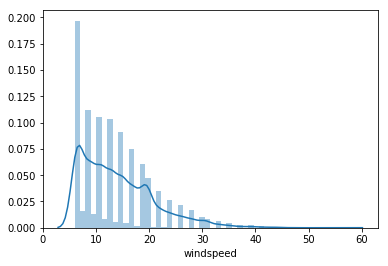

In [22]:
sns.distplot(data['windspeed'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


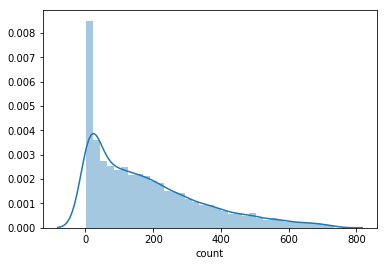

In [23]:
Train = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
Test = data[~pd.notnull(data['count'])].sort_values(by=['datetime'])
datetimecol = Test['datetime']
y = Train['count']
sns.distplot(y)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


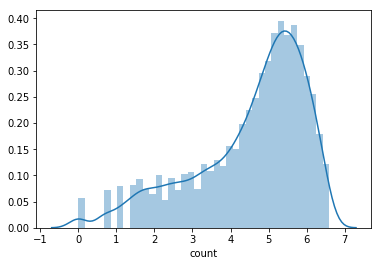

In [24]:
y_log = np.log(y)
sns.distplot(y_log)

In [25]:
Train  = Train.drop(['datetime','date','casual','registered','count'],axis=1)
Test  = Test.drop(['datetime','date','casual','registered','count'],axis=1)
rfModel = RandomForestRegressor(n_estimators=1000,random_state=42)
rfModel.fit(Train,y_log)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
predict_count = rfModel.predict(Test)
Test['predict_count'] = predict_count

In [31]:
predict_result = pd.DataFrame({'datetime': datetimecol,'count': [max(0, x) for x in np.exp(predict_count).round(0)]})
predict_result.to_csv('bike_predictions_RF.csv', index=False)

In [ ]:
# Result: 
# Root mean squared logarithmic error(RMSLE): 0.43005